

question 1:
```



-  read a CSV file containing time and value data into a pandas DataFrame.
- It extracts the time (t) and value (y_actual) columns from the DataFrame.

- It then loops through each equation, from 0 to 4.
- For each equation, it creates a matrix of powers of t from 0 to n.
- It stacks the power matrices horizontally to form the matrix phi_T.
-  The y_actual vector is reshaped to match the dimensions of the input matrices.
-  The code estimates the parameters a0, a1, ..., an using the least squares method.
 - The estimated parameter values are extracted and stored in the a_values array.
 - The a_values array is reshaped for compatibility in the dot product.
 - The code calculates the predicted y values by taking the dot product of phi_T and the reshaped a_values.
 - The estimated parameters and predicted y values are appended to their respective lists.
 - The code calculates the least square error by summing the squared differences between y_actual and y_predicted.
 - Finally, the estimated parameters, predicted y values, and least square error are printed for each equation.

In [36]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data.csv')

# Extract t and y values
t = df['time_stamp'].values
y_actual = df['values'].values


# Create an empty list to store the estimated parameters and predicted y values for each equation
parameters_list = []
y_predicted_list = []

# Loop through each equation
for n in range(0, 5):
    # Create the matrix t^k for each power from 0 to n
    powers = np.arange(n + 1)
    t_powers = np.power.outer(t, powers)

    # Stack the t^k matrices horizontally to form the matrix 𝜙𝑇
    phi_T = np.column_stack(t_powers)

    # Reshape the y_actual vector to match the dimensions of the input matrices
    y_reshaped = y_actual.reshape(-1, 1)

    # Estimate the parameters 𝑎₀, 𝑎₁, ..., 𝑎ₙ using least squares
    parameters = np.linalg.lstsq(phi_T.T, y_reshaped, rcond=None)[0]

    # Extract the estimated values of 𝑎₀, 𝑎₁, ..., 𝑎ₙ
    a_values = parameters.flatten()

    # Reshape the a_values array for compatibility in the dot product
    a_values_reshaped = a_values.reshape(n + 1,)

    # Calculate the predicted y values
    y_predicted = np.dot(phi_T.T, a_values_reshaped)

    # Append the estimated parameters and predicted y values to the respective lists
    parameters_list.append(a_values)
    y_predicted_list.append(y_predicted)

    # Calculate the least square error
    error = 0.5 * np.sum(np.square(y_actual - y_predicted))

    # Print the estimated parameters, predicted y values, and least square error for each equation
    print("Equation", n + 1)
    print("Estimated parameters:", a_values)
    print("Predicted y values:", y_predicted)
    print("Least square error:", error)
    print()

# Access the estimated parameters and predicted y values for each equation using the parameters_list and y_predicted_list
# For example, parameters_list[0] gives the estimated parameters for the first equation.
# Similarly, y_predicted_list[1] gives the predicted y values for the second equation.


Equation 1
Estimated parameters: [90.89224526]
Predicted y values: [90.89224526 90.89224526 90.89224526 90.89224526 90.89224526 90.89224526
 90.89224526 90.89224526 90.89224526 90.89224526 90.89224526 90.89224526
 90.89224526 90.89224526 90.89224526]
Least square error: 55049.9774943533

Equation 2
Estimated parameters: [-41.56671445  18.92270853]
Predicted y values: [-41.56671445 -22.64400592  -3.72129739  15.20141114  34.12411967
  53.0468282   71.96953673  90.89224526 109.81495379 128.73766232
 147.66037085 166.58307938 185.50578791 204.42849644 223.35120497]
Least square error: 4920.331756760632

Equation 3
Estimated parameters: [ 3.34292721 -1.80481839  1.48053764]
Predicted y values: [  3.34292721   3.01864645   5.65544098  11.25331077  19.81225585
  31.33227619  45.81337181  63.2555427   83.65878887 107.02311031
 133.34850703 162.63497902 194.88252628 230.09114882 268.26084663]
Least square error: 398.9835544644056

Equation 4
Estimated parameters: [ 1.88449686 -0.28762345  1.20

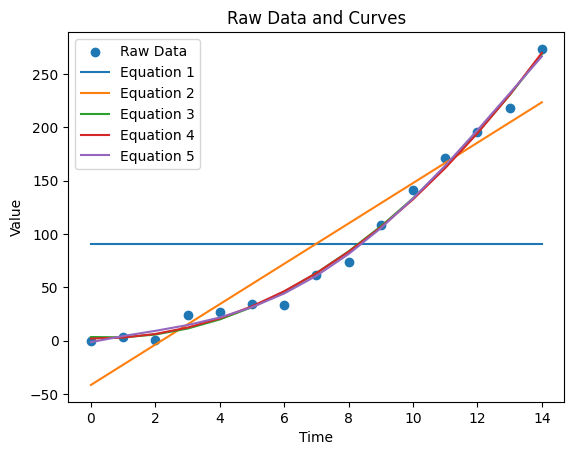

In [37]:
import matplotlib.pyplot as plt

# Plot the raw data
plt.scatter(t, y_actual, label='Raw Data')

# Plot the curves for each equation
for n in range(5):
    plt.plot(t, y_predicted_list[n], label=f'Equation {n+1}')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw Data and Curves')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [42]:
# Loop through each equation
for n in range(5):


    # Calculate the loss function (least square error)
    loss = 0.5 * np.sum(np.square(y_actual - y_predicted_list[n]))

    # Print the equation, true parameters, and loss function
    print(f"Equation {n+1}")
    print(f"𝑦 = {' + '.join([f'𝑎{i} * 𝑡^{i}' for i in range(n+1)])}")

    print(f"Loss Function: {loss}")
    print()



Equation 1
𝑦 = 𝑎0 * 𝑡^0
Loss Function: 55049.9774943533

Equation 2
𝑦 = 𝑎0 * 𝑡^0 + 𝑎1 * 𝑡^1
Loss Function: 4920.331756760632

Equation 3
𝑦 = 𝑎0 * 𝑡^0 + 𝑎1 * 𝑡^1 + 𝑎2 * 𝑡^2
Loss Function: 398.9835544644056

Equation 4
𝑦 = 𝑎0 * 𝑡^0 + 𝑎1 * 𝑡^1 + 𝑎2 * 𝑡^2 + 𝑎3 * 𝑡^3
Loss Function: 393.8747017729235

Equation 5
𝑦 = 𝑎0 * 𝑡^0 + 𝑎1 * 𝑡^1 + 𝑎2 * 𝑡^2 + 𝑎3 * 𝑡^3 + 𝑎4 * 𝑡^4
Loss Function: 357.4330663036461



result:from the previous table  the equation 3 is the best **because it is less risk in terms of over fitting
**

In [73]:
# Define the equation parameters
a0_true = 1.0
a1_true = 2.0
a2_true = 3.0

# Initialize RLS variables
theta = np.zeros(3)  # Initial parameter estimate
learning_rate = 0.015

# Calculate loss using RLS method

loss_rlms = 0.0
for i in range(len(t)):
    # Calculate the predicted y value
    y_predicted = theta[0] * t[i] ** 0 + theta[1] * t[i] ** 1 + theta[2] * t[i] ** 2

    # Update the parameter estimate
    theta += learning_rate * (y_actual[i] - y_predicted)

    # Update the loss
    loss_rlms += 0.5*(y_actual[i] - y_predicted) ** 2

# Print the loss using RLMS method
print("Loss using Recursive Least Mean Squares (RLMS) method:", loss_rlms)



Loss using Recursive Least Mean Squares (RLMS) method: 996.685379326241


result: the estimation is less accurate because it is not the optimized solution
i need to update the wights with the best learning rate

question 2


- implement the Recursive Least Squares (RLS) algorithm for parameter estimation.
-  function takes an input signal, forgetting factor, and flag for exponential forgetting as parameters.
- estimate the parameters of a true model by iteratively updating parameter estimates and covariance matrix.
-aggregates the output, error, and estimated parameter values.
The code includes three parts: A, B, and C, each with different input signals and settings.
- Part A tests the algorithm with a simple input signal.
- Part B uses a more complex input signal combining sine and cosine functions.
- Part C demonstrates the use of exponential forgetting.
The code plots the input signal, output signal, error, and estimated parameter values for each part.

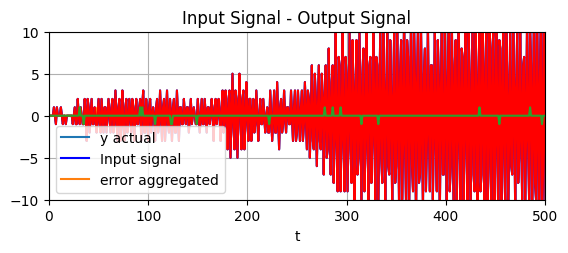

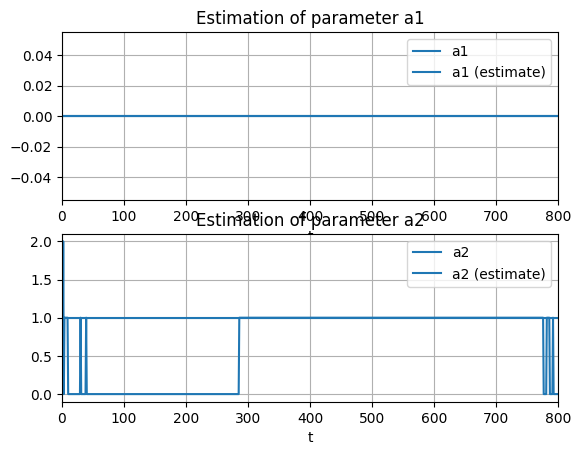

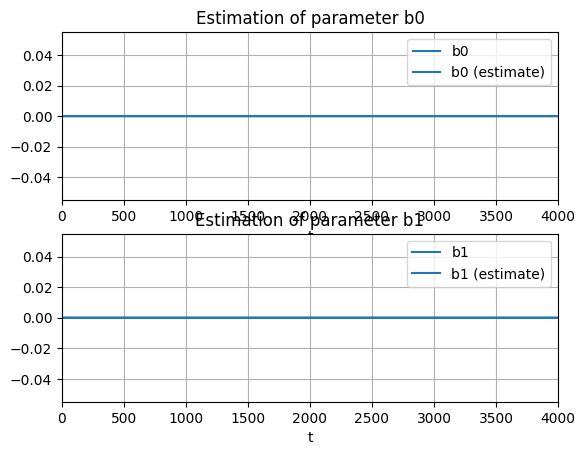

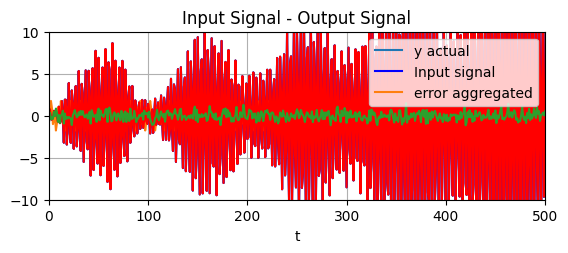

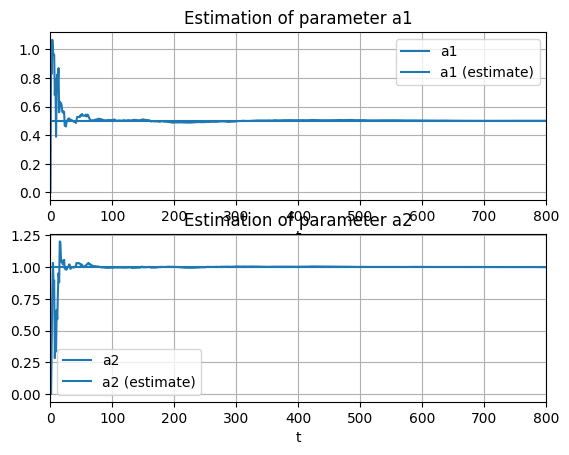

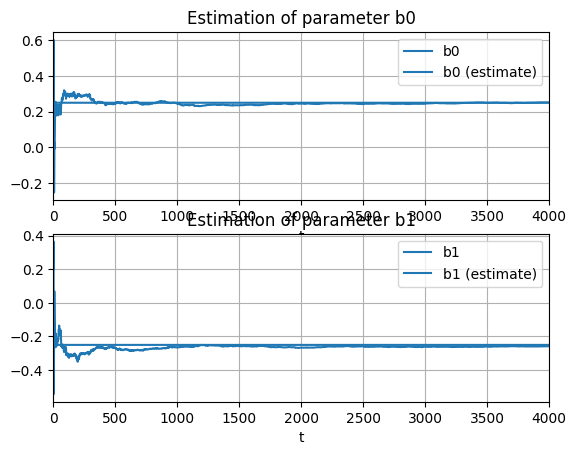

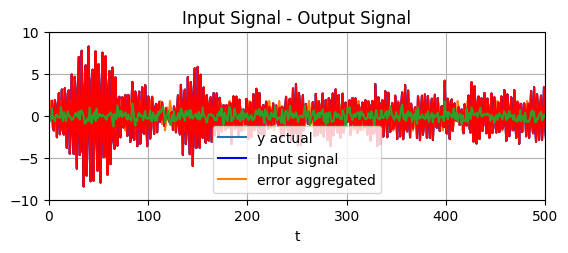

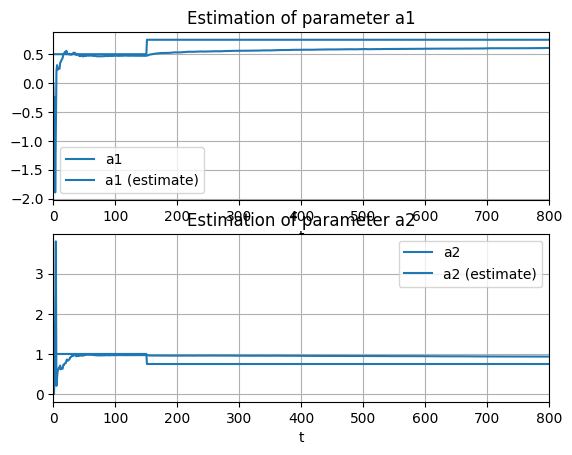

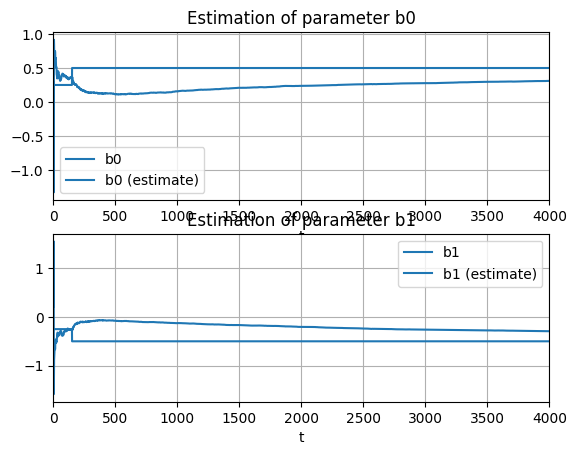

In [119]:
import numpy as np
import matplotlib.pyplot as plt


def recursive_least_square_general(input_signal_rls, forgetting_factor, exp_forgetting):
    # Initialization
    lambda_val = forgetting_factor
    y_k2 = 0
    y_k1 = 0
    u_k1 = 0
    u_k2 = 0
    phi = np.array([-y_k1, -y_k2, u_k1, u_k2])

    # Parameters of the true model
    at1 = 0.5
    at2 = 1
    bt0 = 0.25
    bt1 = -0.25

    # Input signal
    input_signal = input_signal_rls

    # Initial parameter values
    param_estimated = np.array([0, 0, 0.01, 0.2]).reshape(-1, 1)

    # Initial covariance matrix
    cov = np.eye(4)
    cov[0, 0] = 100
    cov[1, 1] = 100
    cov[2, 2] = 100
    cov[3, 3] = 100

    # Initialize variables
    flag = 0
    y_actual_aggregate = np.zeros_like(input_signal)
    error_aggregated = np.zeros_like(input_signal)
    a1_aggregated = np.zeros_like(input_signal)
    a2_aggregated = np.zeros_like(input_signal)
    b0_aggregated = np.zeros_like(input_signal)
    b1_aggregated = np.zeros_like(input_signal)
    at1_aggregate = np.zeros_like(input_signal)
    at2_aggregate = np.zeros_like(input_signal)
    bt0_aggregate = np.zeros_like(input_signal)
    bt1_aggregate = np.zeros_like(input_signal)

    # Parameter estimation loop
    for q in range(len(input_signal)):
        # Change parameters after 150 iterations if exp_forgetting is enabled
        if q > 150 and flag == 0 and exp_forgetting == 1:
            flag = 1
            at1 = 0.75
            at2 = 0.75
            bt0 = 0.5
            bt1 = -0.5

        # Estimate the parameters (RLS)
        phi = np.array([-y_k1, -y_k2, u_k1, u_k2]).reshape(1, -1)
        error = np.random.normal(0, 0.5)

        y_current_actual = -at1 * y_k1 - at2 * y_k2 + bt0 * u_k1 + bt1 * u_k2 + error  # Measurement
        y_actual_aggregate[q] = y_current_actual
        error_aggregated[q] = error

        cov = cov - cov @ phi.T @ np.linalg.inv(lambda_val + phi @ cov @ phi.T) @ phi @ cov
        k = cov @ phi.T
        param_estimated = param_estimated + k @ (y_current_actual - phi @ param_estimated)

        a1 = param_estimated[0]
        a2 = param_estimated[1]
        b0 = param_estimated[2]
        b1 = param_estimated[3]
        a1_aggregated[q] = a1
        a2_aggregated[q] = a2
        b0_aggregated[q] = b0
        b1_aggregated[q] = b1

        # Output
        y_est = np.dot(phi, param_estimated)


        # Update
        old_y_k1 = y_k1
        old_u_k1 = u_k1
        y_k2 = y_k1
        y_k1 = y_current_actual
        u_k2 = u_k1
        u_k1 = input_signal[q]

        at1_aggregate[q] = at1
        at2_aggregate[q] = at2
        bt0_aggregate[q] = bt0
        bt1_aggregate[q] = bt1

    # Plot the output and the input signal
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(y_actual_aggregate)
    plt.plot(y_actual_aggregate, color='blue')



    plt.plot(input_signal)
    plt.xlabel("t")
    plt.xlim([0, 500])
    plt.ylim([-10, 10])
    plt.plot(y_actual_aggregate, color='red')



    plt.plot(error_aggregated)
    plt.xlabel("t")
    plt.xlim([0, 500])
    plt.ylim([-10, 10])
    plt.title('Input Signal - Output Signal')
    plt.legend(['y actual', 'Input signal', 'error aggregated'])
    plt.grid(True)

    # Plot the estimated parameters
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(at1_aggregate)
    plt.gca().set_prop_cycle(None)


    plt.plot(a1_aggregated)
    plt.xlabel("t")
    plt.xlim([0, 800])
    plt.title('Estimation of parameter a1')
    plt.legend(['a1', 'a1 (estimate)'])
    plt.grid(True)
    plt.subplot(2, 1, 2)
    plt.plot(at2_aggregate)
    plt.gca().set_prop_cycle(None)


    plt.plot(a2_aggregated)
    plt.xlabel("t")
    plt.xlim([0, 800])
    plt.title('Estimation of parameter a2')
    plt.legend(['a2', 'a2 (estimate)'])
    plt.grid(True)

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bt0_aggregate)
    plt.gca().set_prop_cycle(None)


    plt.plot(b0_aggregated)
    plt.xlabel("t")
    plt.xlim([0, 4000])
    plt.title('Estimation of parameter b0')
    plt.legend(['b0', 'b0 (estimate)'])
    plt.grid(True)
    plt.subplot(2, 1, 2)
    plt.plot(bt1_aggregate)
    plt.gca().set_prop_cycle(None)


    plt.plot(b1_aggregated)
    plt.xlabel("t")
    plt.xlim([0, 4000])
    plt.title('Estimation of parameter b1')
    plt.legend(['b1', 'b1 (estimate)'])
    plt.grid(True)

    plt.show()


# Part A
t = np.arange(1, 10001)
input_signal_1 = np.zeros_like(t)
input_signal_1[49] = 1
recursive_least_square_general(input_signal_1, 1, 0)

# Part B
input_signal_2 = np.sin(2 * np.pi * t / 10) + np.cos(6 * np.pi * t / 10)
recursive_least_square_general(input_signal_2, 1, 0)

# Part C
recursive_least_square_general(input_signal_2, 0.99, 1)


the first signal has bad result because the sigmal is impulse so it dosnt excite the system


the second signal is the best one because the maybe the system is not changing after 150